In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

**Classifying newswires**
Here we are going to classify newswires into 46 mutually exclusive class topics. Each topic has like 10 examples in the training set


**Loading the DataSet**

In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
type(test_data[0][0])

int

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()   #so, word index is a dictionary containing keys as words and values as numbers
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_news_wire = ' '.join([reverse_word_index.get(i-3 , '?') for i in train_data[1]])

557056/550378 [==============================] - 0s 0us/step


**Preparing the data :-** vectorize the data i.e if we have a list [3,5] and we want to convert into a vector of dim=10000. what we'll do is, we are going to put 1's at indices 3 and 5 and zeroes evrywherelse

**Vectorizing self built function**

In [0]:
import numpy as np
def vectorize_sequence(sequence, dim=10000):
  result = np.zeros((len(sequence), dim))
  for i, Sequence in enumerate(sequence):
    result[i, Sequence] = 1
  return result

In [0]:
def to_one_hot(labels, dim=46):
  result = np.zeros((len(labels),dim))
  for i, lab in enumerate(labels):
    result[i,lab] =1
  return result 

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

**vectorizing labels using keras**

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
x_train.shape

(8982, 10000)

In [12]:
#model definition
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) # bc we want probabilities as outputs

#model Compilation
#we'll be using loss as categorical crossentropy bc it calculates the distance between the two probability distributions
#which in our case are the prob dist output by the network and true istribution by the labels

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Setting aside validation set (trainig data)
x_val  = x_train[:1000]
partial_x_train = x_train[1000:]

y_val =one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
# Training the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs =20,
                    batch_size=512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 413us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.4581 - acc: 0.

In [0]:
history_dict  = history.history

In [16]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [17]:
history_dict['val_acc']

[0.6120000009536744,
 0.7060000066757202,
 0.7429999876022338,
 0.7589999938011169,
 0.7809999952316284,
 0.8039999895095825,
 0.8019999942779541,
 0.7889999942779541,
 0.8090000028610229,
 0.8110000052452088,
 0.8130000114440918,
 0.8129999980926513,
 0.8110000076293945,
 0.8050000076293945,
 0.8150000138282776,
 0.8059999895095825,
 0.7970000100135803,
 0.8059999942779541,
 0.7969999942779541,
 0.8020000004768372]

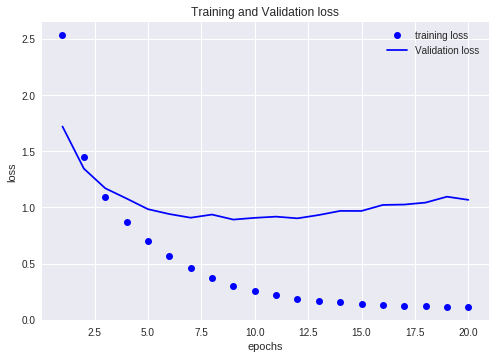

In [18]:
#plotting training and validation loss
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss,'bo', label = "training loss")
plt.plot(epochs, val_loss,'b', label = 'Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

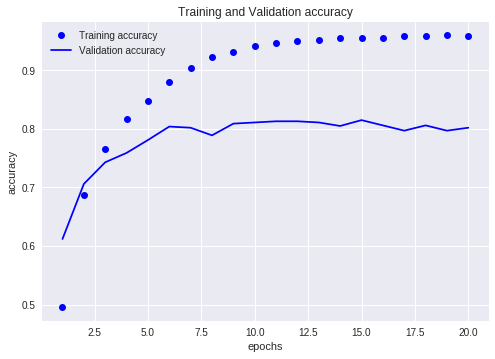

In [19]:
#plotting training and validation accuracy

plt.clf()

val_acc = history_dict["val_acc"]
acc = history_dict["acc"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

**So, as you can see in the loss plot that at around epoch 9 the loss decreases and then start increasing again and the trainin loss keeps on decreasing so, this means that after epoch 9 the data starts to overfit the model and thus results in over training**

In [24]:
#model definition
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) # bc we want probabilities as outputs

#model Compilation
#we'll be using loss as categorical crossentropy bc it calculates the distance between the two probability distributions
#which in our case are the prob dist output by the network and true istribution by the labels

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs =9,
                    batch_size = 512,
                   validation_data = (x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)



Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 107us/step - loss: 2.4777 - acc: 0.5273 - val_loss: 1.6362 - val_acc: 0.6440
Epoch 2/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.3466 - acc: 0.7186 - val_loss: 1.2585 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 80us/step - loss: 1.0070 - acc: 0.7902 - val_loss: 1.1432 - val_acc: 0.7370
Epoch 4/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.8023 - acc: 0.8291 - val_loss: 1.0153 - val_acc: 0.7870
Epoch 5/9
7982/7982 [==============================] - 1s 81us/step - loss: 0.6366 - acc: 0.8659 - val_loss: 0.9874 - val_acc: 0.8080
Epoch 6/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.5114 - acc: 0.8911 - val_loss: 0.9353 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 79us/step - loss: 0.4113 - acc: 0.9108 - val_loss: 0.9236 - val_acc: 0.8010
Epoch 8/9
798

In [23]:
results

[0.9839375118856863, 0.7858414960459524]

**Generating predictions on new data**

the Predict method of the model instance returns a probability distribution over all 46 topics

In [0]:
predictions = model.predict(x_test)

In [27]:
predictions[0].shape

(46,)

In [28]:
np.sum(predictions[0])

1.0

In [30]:
predictions[0].max()

0.53437555

In [31]:
x_test.shape

(2246, 10000)

**The Importance of having sufficiently large intermediate layers**

In [32]:
#model definition
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) # bc we want probabilities as outputs

#model Compilation
#we'll be using loss as categorical crossentropy bc it calculates the distance between the two probability distributions
#which in our case are the prob dist output by the network and true istribution by the labels

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs =9,
                    batch_size = 512,
                   validation_data = (x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 117us/step - loss: 2.5818 - acc: 0.4409 - val_loss: 1.7088 - val_acc: 0.6030
Epoch 2/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.4944 - acc: 0.6688 - val_loss: 1.3802 - val_acc: 0.6900
Epoch 3/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.1862 - acc: 0.7224 - val_loss: 1.2313 - val_acc: 0.7090
Epoch 4/9
7982/7982 [==============================] - 1s 75us/step - loss: 0.9738 - acc: 0.7714 - val_loss: 1.1279 - val_acc: 0.7400
Epoch 5/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.7934 - acc: 0.8152 - val_loss: 1.0613 - val_acc: 0.7590
Epoch 6/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.6504 - acc: 0.8485 - val_loss: 1.0102 - val_acc: 0.7750
Epoch 7/9
7982/7982 [==============================] - 1s 78us/step - loss: 0.5417 - acc: 0.8707 - val_loss: 1.0010 - val_acc: 0.7810
Epoch 8/9
798

In [33]:
results

[1.1565446957667174, 0.7582368655387355]